# Machine Learning Final Project  

> 作者: 吳孟維 0816120  
> Github Link: https://github.com/wumengwei0213/CS_CS20024_final_project  
> Reference:   
    https://www.kaggle.com/competitions/tabular-playground-series-aug-2022/discussion/349385  
    https://www.kaggle.com/code/johnybhiduri/tabular-playground-series-keras  

## Brief Intro.  
    After researching some discussion on the Kaggle, I have breif concept of this competition. I decide to design the NN model by myself in order to treat this project as a self-traing and strengthen my skill in machine learning region. With looking into the data, I found that feature "loading" has a great relationship with the goal. And the features that is categorical are not much assosiate with the goal, so I decided to drop these feature to focus on the numerial features. The crux that I can pass the baseline is adding "model assembling" at the end of training model. I chose models that got top-5 score in the Kaggle private leaderboard and re-made the prediction.
    
## Model Architecture  
![](https://i.imgur.com/DZCUs6I.png)  
### Hyperparameters  
> optimizer = Adam with learning_rate=0.001  
> loss = 'binary_crossentropy'  
> validation_split = 0.3  
> batch_size = 128  
> epochs = 10  

## Summary

I got 0.59022 in the end.

| Name         | Private Score | Public Score |
| ------------------ |---------------- | -------------- |
| inference.csv   |     0.59022         |      0.5803       |  

![](https://i.imgur.com/2GD780n.png)


## Methodology 

### Import Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import KFold
# from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

### Data Loading
According to the research, adding columns that corresponds to if there is NA value in the features "measurement 3-6" can improve AUC value.

In [2]:
train = pd.read_csv('train.csv')
pd.set_option('display.max_columns',None)

train['miss3'] = train['measurement_3'].isna().astype(int)*32
train['miss4'] = train['measurement_4'].isna().astype(int)*32
train['miss5'] = train['measurement_5'].isna().astype(int)*32
train['miss6'] = train['measurement_6'].isna().astype(int)*32
train.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,miss3,miss4,miss5,miss6
0,0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0,0,0,0,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0,0,0,0,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0,0,0,0,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0,0,0,0,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0,0,0,0,0


### Data Prepoccessing
- Pick the beneficial features for training  
- Replace NA with mean value of the feature

In [3]:
checkColumns = ['loading','measurement_0','measurement_1','measurement_2','measurement_3','measurement_4','measurement_5','measurement_6','measurement_7','measurement_8','measurement_9','measurement_10','measurement_11','measurement_12','measurement_13','measurement_14','measurement_15','measurement_16','miss3','miss4','miss5']

train_df = train.copy()
for i in checkColumns :
    m = train_df[i].mean()
    train_df[i] = train_df[i].fillna(m)
Y = train_df['failure']
X = train_df[checkColumns]

### Deprecated Method

> Add RandomOverSampler to make the data more balance

#### Result  

> It did not enhance the score, so I remove it.

```
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, shuffle = True, random_state = 144)
num_samples = int(y_train.value_counts().mean())
majority_ind = y_train[y_train == 0.0].index
samples_to_drop = y_train[majority_ind].sample(num_samples, random_state = 1).index
x_train = x_train.drop(samples_to_drop, axis = 0)
y_train = y_train.drop(samples_to_drop, axis = 0)
over_sampler = RandomOverSampler(random_state = 1)
x_train,y_train = over_sampler.fit_resample(x_train, y_train)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns, index = x_train.index)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns, index = x_test.index)
```


### Train Test Split

In [4]:
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, shuffle = True, random_state = 144)
x_train

,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,miss3,miss4,miss5
22216,109.270000,1,18,1,19.247,11.069000,17.675,17.781,10.855000,18.867000,11.199,17.508,21.108000,11.264,15.064000,16.612,16.558,13.381,0,0,0
18029,160.020000,3,7,13,18.546,10.638000,16.686,17.536,12.078000,18.988000,10.065,18.266,18.944000,11.034,14.011000,17.752,15.723,13.628,0,0,0
17046,162.310000,8,13,12,18.851,12.204000,16.031,16.599,12.715000,20.078000,12.471,18.242,21.241000,13.247,13.909000,15.049,14.945,16.207,0,0,0
3397,118.510000,11,2,2,15.033,11.413000,16.297,17.797,10.999000,19.133000,12.864,15.493,19.172085,14.546,15.809000,14.545,16.825,20.565,0,0,0
16532,147.620000,4,10,9,18.490,11.731988,20.569,17.462,13.069000,19.024714,11.224,18.111,21.010000,12.004,16.814000,17.122,14.093,14.548,0,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17830,86.650000,5,11,10,16.651,13.058000,18.441,18.240,11.997000,20.829000,11.932,15.203,17.686000,10.829,14.074000,15.362,16.102,15.175,0,0,0
7384,109.450000,7,13,5,18.227,11.841000,17.107,18.150,11.910000,19.024714,12.298,15.969,16.164000,10.801,13.631000,14.734,13.268,17.126,0,0,0
22394,127.826233,6,11,5,18.029,9.568000,17.183,16.258,12.597000,18.625000,11.518,15.229,18.614000,9.435,14.862000,16.019,13.750,16.952,0,0,0
1468,88.290000,9,5,3,18.092,12.160000,18.499,16.669,10.590000,19.776000,11.568,15.155,19.605000,10.535,15.652904,14.368,15.091,16.606,0,0,0


### Prediction Data Generating and Model Saving

In [5]:
def outp(auc) :
    test = pd.read_csv('test.csv')
    pd_id = test['id']

    test['miss3'] = test['measurement_3'].isna().astype(int)*32
    test['miss4'] = test['measurement_4'].isna().astype(int)*32
    test['miss5'] = test['measurement_5'].isna().astype(int)*32
    test['miss6'] = test['measurement_6'].isna().astype(int)*32

    for i in checkColumns :
        m = test[i].mean()
        test[i] = test[i].fillna(m)
    test = test[checkColumns]

    predictions = model.predict(test)
    predictions = pd.DataFrame(predictions, columns=['failure'])
    out = pd.concat([pd_id, predictions],axis=1)
    out.to_csv(f'save/out{auc}.csv',index=False)
    model.save(f'save/model_{auc}.h5')

### Building Model and Training

In [6]:
while 1 :

    inputs = tf.keras.Input(shape = (x_train.shape[1],))
    x = tf.keras.layers.Normalization(axis=-1)(inputs)
    x = tf.keras.layers.Dense(256, activation = 'relu')(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(256, activation = 'relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(256, activation = 'relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(64, activation = 'relu')(x)
    outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

    model = tf.keras.Model(inputs = inputs, outputs = outputs)
    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
        loss = 'binary_crossentropy',
        metrics = [
            'accuracy',
            tf.keras.metrics.AUC(name = 'auc')
        ]
    )
    history = model.fit(
        x_train,
        y_train,
        validation_split = 0.3,
        batch_size = 128,
        epochs = 10,
    )

    
    print(history.history['val_auc'])
    
    if(history.history['val_auc'][-1] > 0.58) :
        outp(str(round(history.history['val_auc'][-1],4)))
        break


Epoch 1/10
109/109 [==============================] - 8s 11ms/step - loss: 0.5679 - accuracy: 0.7529 - auc: 0.5240 - val_loss: 0.5555 - val_accuracy: 0.7869 - val_auc: 0.5746
Epoch 2/10
109/109 [==============================] - 1s 7ms/step - loss: 0.5383 - accuracy: 0.7772 - auc: 0.5376 - val_loss: 0.5141 - val_accuracy: 0.7919 - val_auc: 0.5639
Epoch 3/10
109/109 [==============================] - 1s 7ms/step - loss: 0.5282 - accuracy: 0.7828 - auc: 0.5483 - val_loss: 0.5145 - val_accuracy: 0.7919 - val_auc: 0.5683
Epoch 4/10
109/109 [==============================] - 1s 7ms/step - loss: 0.5276 - accuracy: 0.7841 - auc: 0.5490 - val_loss: 0.5063 - val_accuracy: 0.7918 - val_auc: 0.5727
Epoch 5/10
109/109 [==============================] - 1s 7ms/step - loss: 0.5244 - accuracy: 0.7833 - auc: 0.5558 - val_loss: 0.5064 - val_accuracy: 0.7918 - val_auc: 0.5813
Epoch 6/10
109/109 [==============================] - 1s 8ms/step - loss: 0.5235 - accuracy: 0.7843 - auc: 0.5522 - val_loss: 0.5

In [7]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 21)]              0         
                                                                 
 normalization_1 (Normalizat  (None, 21)               43        
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 256)               5632      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 256)               6579

### Model Evaluating

In [8]:
results = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss : {:.4f}%'.format(results[0]*100))
print('Test Accuracy : {:.3f}%'.format(results[1]*100))
print('Test AUC : {:.4f}%'.format(results[2]*100))

Test Loss : 50.8950%
Test Accuracy : 78.729%
Test AUC : 59.6999%


In [9]:
y_pred = np.array(model.predict(x_test) >= 0.5, dtype = np.int)

208/208 [==============================] - 0s 1ms/step


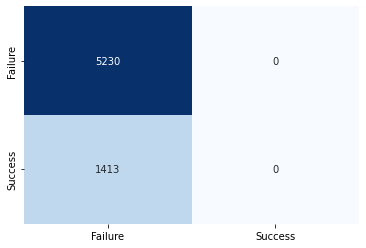

Classification Report : 
              precision    recall  f1-score   support

     Failure       0.79      1.00      0.88      5230
     Success       0.00      0.00      0.00      1413

    accuracy                           0.79      6643
   macro avg       0.39      0.50      0.44      6643
weighted avg       0.62      0.79      0.69      6643



In [10]:
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names = ['Failure', 'Success'])
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False, cmap = 'Blues')
plt.xticks(ticks = (0.5, 1.5), labels = ['Failure', 'Success'])
plt.yticks(ticks = (0.5, 1.5),labels = ['Failure', 'Success'])
plt.show()
print(f'Classification Report : \n{clr}')

### Model Assembling

- Choose models that got top-5 score in the Kaggle private leaderboard and re-made the prediction.

![](https://i.imgur.com/Vv73Vry.png)

- In the end, I chose the max ranking value to do the prediction in those prediction data after several experiments.

![](https://i.imgur.com/w661ZeK.png)  

